In [1]:
import pandas as pd
from IPython.display import display
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

from geodatasets import get_path
import geopandas as gpd

In [2]:
# Load the provided file to check its content
file_path = 'Dados/flavors_of_cacao.csv'
cacao_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
cacao_data.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
display(cacao_data)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [4]:
# Renaming columns
cacao_data.columns = ["company", "bean.bar.origin", "ref", "date", "percent", "location", "rating", "beantype", "origin"]

In [5]:
# Filtering the data for specific locations in Europe and South America, including Brazil
locations_of_interest = ["Brazil", "France", "U.S.A.", "Canada", "Ecuador", "Peru", "Venezuela"]
filtered_data = cacao_data[cacao_data['location'].isin(locations_of_interest)]

# Group by 'location' and summarize count, mean, and standard deviation of ratings
grouped_data = filtered_data.groupby('location').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean'),
    sd_rating=('rating', 'std')
).reset_index()

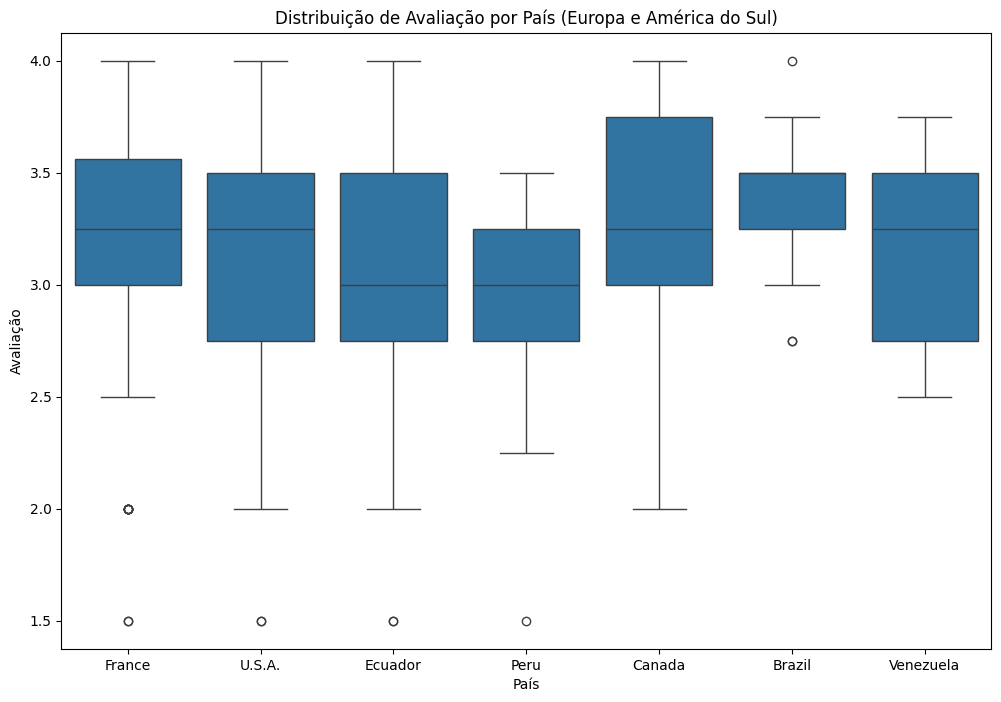

In [7]:
# Creating a boxplot for the 'rating' by 'location'
plt.figure(figsize=(12, 8))
sns.boxplot(x="location", y="rating", data=filtered_data)
plt.title('Distribuição de Avaliação por País (Europa e América do Sul)')
plt.xlabel('País')
plt.ylabel('Avaliação')
plt.show()

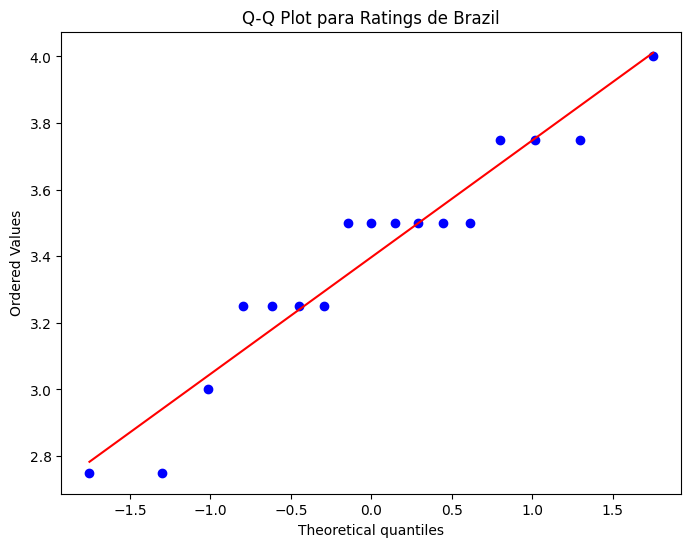

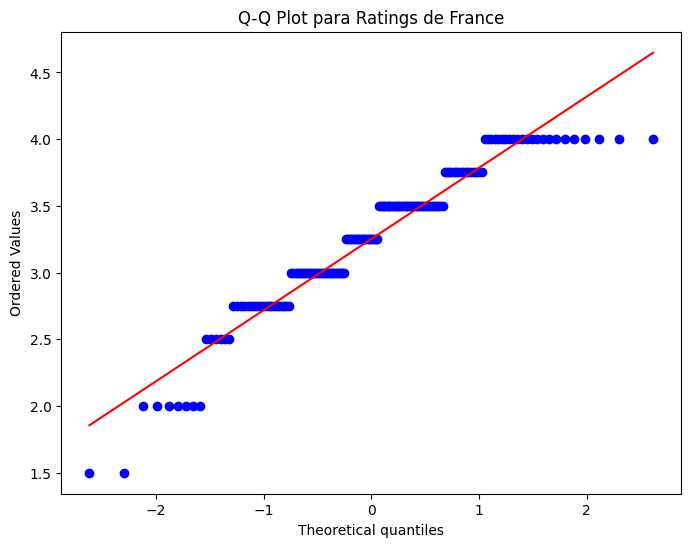

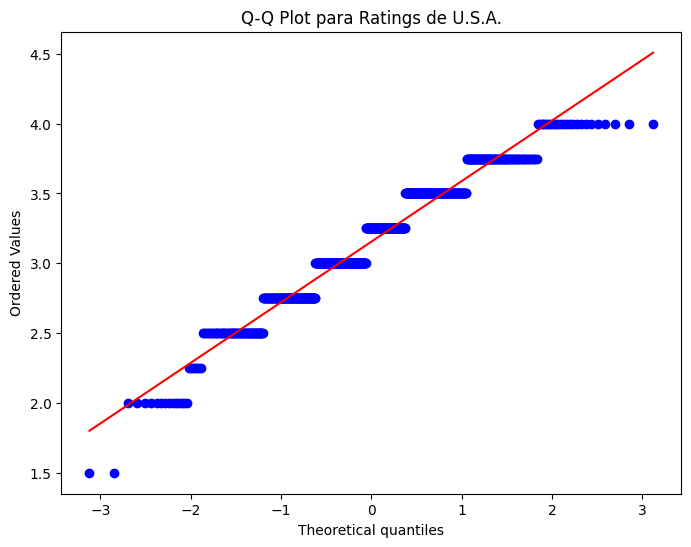

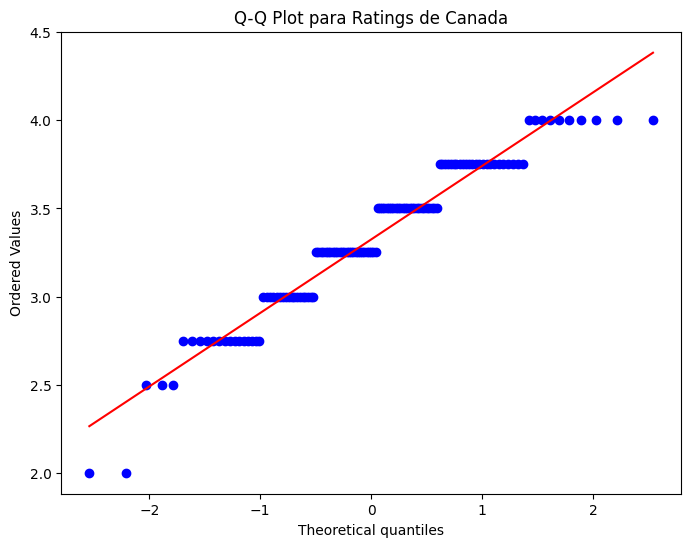

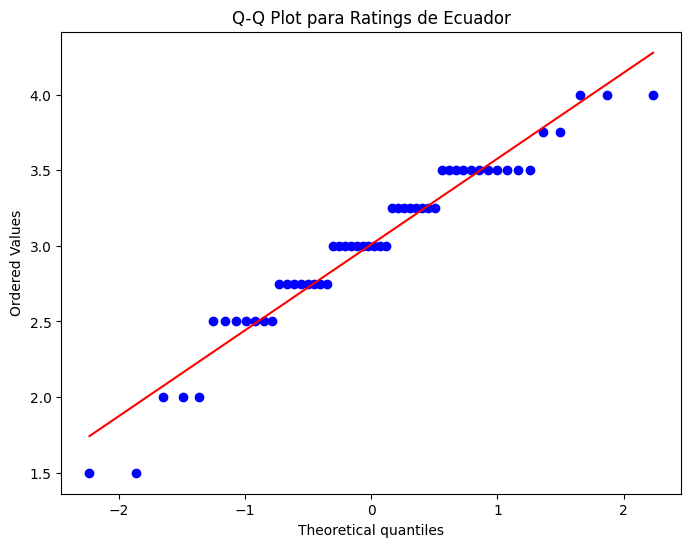

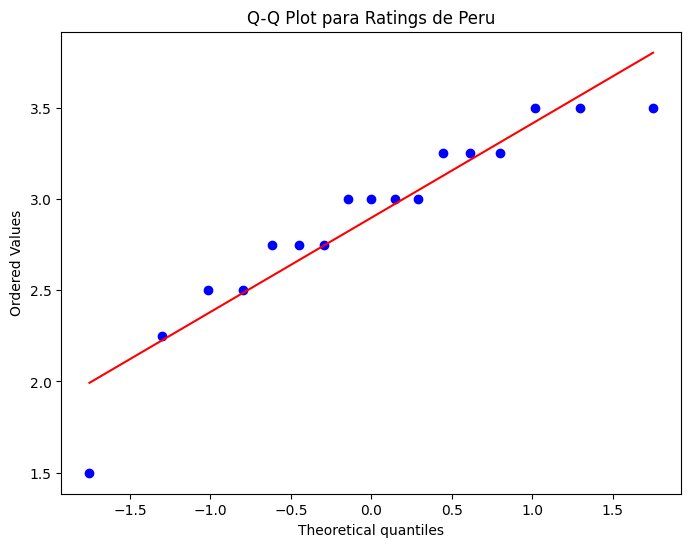

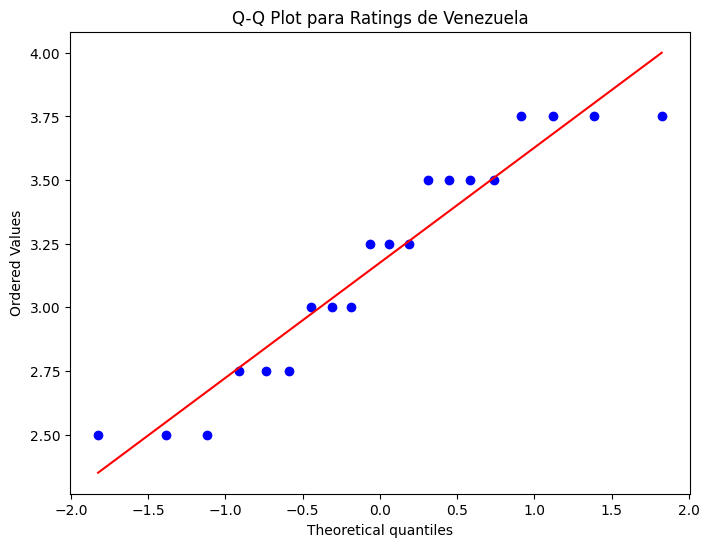

In [8]:
#Create a Q-Q plot for the 'rating' by 'location' for each selected country

# Loop over each country and generate a Q-Q plot for 'rating'
for location in locations_of_interest:
    location_data = filtered_data[filtered_data['location'] == location]['rating'].dropna()
    
    # Generate the Q-Q plot for the ratings of the current country
    plt.figure(figsize=(8, 6))
    stats.probplot(location_data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot para Ratings de {location}")
    plt.show()

In [9]:
# Melting the filtered data for analysis in the OLS model
melted_data_for_ols = pd.melt(filtered_data, id_vars=['location'], value_vars=['rating'])

# Ordinary Least Squares (OLS) model
model = ols('value ~ location', data=melted_data_for_ols).fit()

# Performing ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Displaying the ANOVA table
anova_table

,sum_sq,df,F,PR(>F)
location,7.639074,6.0,5.964436,0.000004
Residual,244.627188,1146.0,NaN,NaN


In [10]:
res = stat()
res.anova_stat(df=melted_data_for_ols, res_var='value', anova_model='value ~ location')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
location,6.0,7.639074,1.273179,5.964436,0.000004
Residual,1146.0,244.627188,0.213462,NaN,NaN
